# Task 1

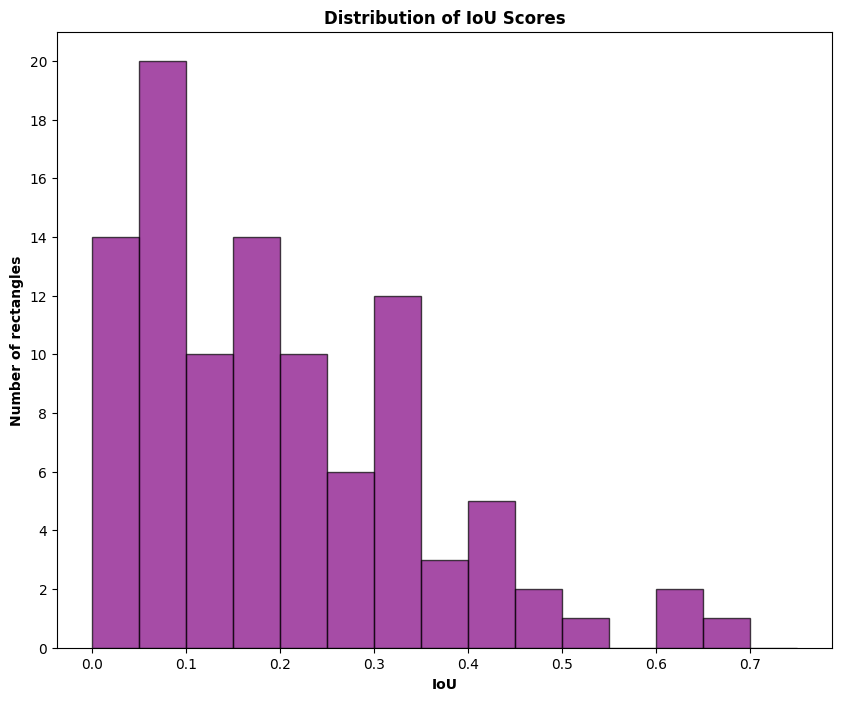

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import flammkuchen as fk

#Function to compute IoU
def calculate_iou(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    
    if ((x1 + w1) <= x2) or ((x2 + w2) <= x1 ) or ((y1 - h1) >= y2) or ((y2 - h2) >= y1): 
        x_len = 0
        y_len = 0
    else:   
    # Calculate the sides of the intersection rectangle
        x_len = np.abs(max(x1,x2) - min(x1 + w1, x2 + w2))
        y_len = np.abs(min(y1,y2) - max(y1 - h1, y2 - h2))
    
    intersection_area = x_len * y_len       
    union_area = w1 * h1 + w2 * h2 - intersection_area
    
    iou_score = intersection_area / (union_area + 1e-7)
    
    return iou_score

data = fk.load('rectangles_dsss.sec')
ground_truth = data['ground_truth']
predicted = data['predicted']

# Compute IoU scores
iou_scores = []
for gt, pred in zip(ground_truth, predicted):
    iou = calculate_iou(gt, pred)
    iou_scores.append(iou)

# Plotting IoU scores in a histogram    
plt.figure(figsize=(10,8))
bins = np.arange(0, 0.8, 0.05)
plt.hist(iou_scores, bins=bins, color='purple', edgecolor='black', alpha = 0.7)
plt.yticks(range(0, 22, 2))
plt.title('Distribution of IoU Scores', fontweight='bold')
plt.xlabel('IoU', fontweight='bold')
plt.ylabel('Number of rectangles', fontweight='bold')
plt.show()

# Task  2

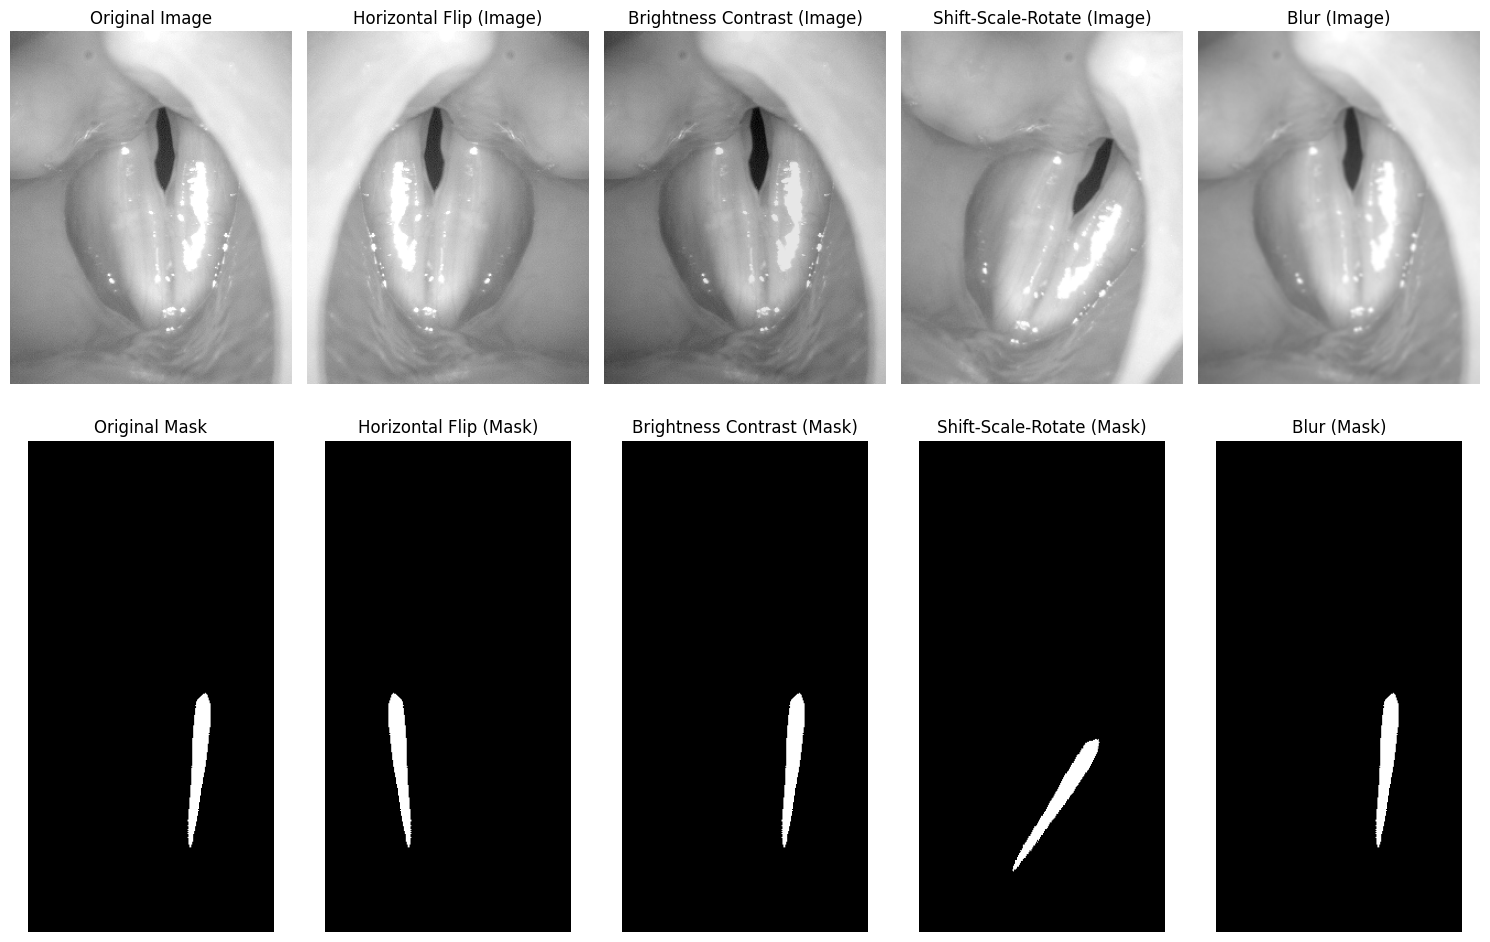

In [14]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A

# Set the random seed
np.random.seed(123456)  # Replace with your matriculation number

# Define paths to the dataset
dataset_path = "Mini_BAGLS_dataset"

# Load all image and mask paths
image_files = sorted([f for f in os.listdir(dataset_path) if f.endswith(".png") and "_seg" not in f])
mask_files = sorted([f for f in os.listdir(dataset_path) if f.endswith("_seg.png")])

# Randomly select an image and its mask
random_idx = np.random.choice(len(image_files))
image_path = os.path.join(dataset_path, image_files[random_idx])
mask_path = os.path.join(dataset_path, mask_files[random_idx])

# Load the image and mask
image = np.array(Image.open(image_path))
mask = np.array(Image.open(mask_path))

# Define individual augmentation transformations
augmentations = [
    A.HorizontalFlip(p=1.0),
    A.RandomBrightnessContrast(p=1.0),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=30, p=1.0),
    A.Blur(blur_limit=3, p=1.0)
]

# Apply augmentations
augmented_images = []
augmented_masks = []
for aug in augmentations:
    augmented = aug(image=image, mask=mask)
    augmented_images.append(augmented["image"])
    augmented_masks.append(augmented["mask"])

# Plot the original and augmented images with masks
fig, axs = plt.subplots(2, len(augmentations) + 1, figsize=(15, 10))

# Display the original image and mask
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")
axs[1, 0].imshow(mask, cmap="gray")
axs[1, 0].set_title("Original Mask")
axs[1, 0].axis("off")

# Display each augmented image and mask
titles = ["Horizontal Flip", "Brightness Contrast", "Shift-Scale-Rotate", "Blur"]
for i, (aug_img, aug_mask, title) in enumerate(zip(augmented_images, augmented_masks, titles)):
    axs[0, i + 1].imshow(aug_img)
    axs[0, i + 1].set_title(f"{title} (Image)")
    axs[0, i + 1].axis("off")
    axs[1, i + 1].imshow(aug_mask, cmap="gray")
    axs[1, i + 1].set_title(f"{title} (Mask)")
    axs[1, i + 1].axis("off")

plt.tight_layout()
plt.savefig("augmented_images_task2.png")
plt.show()



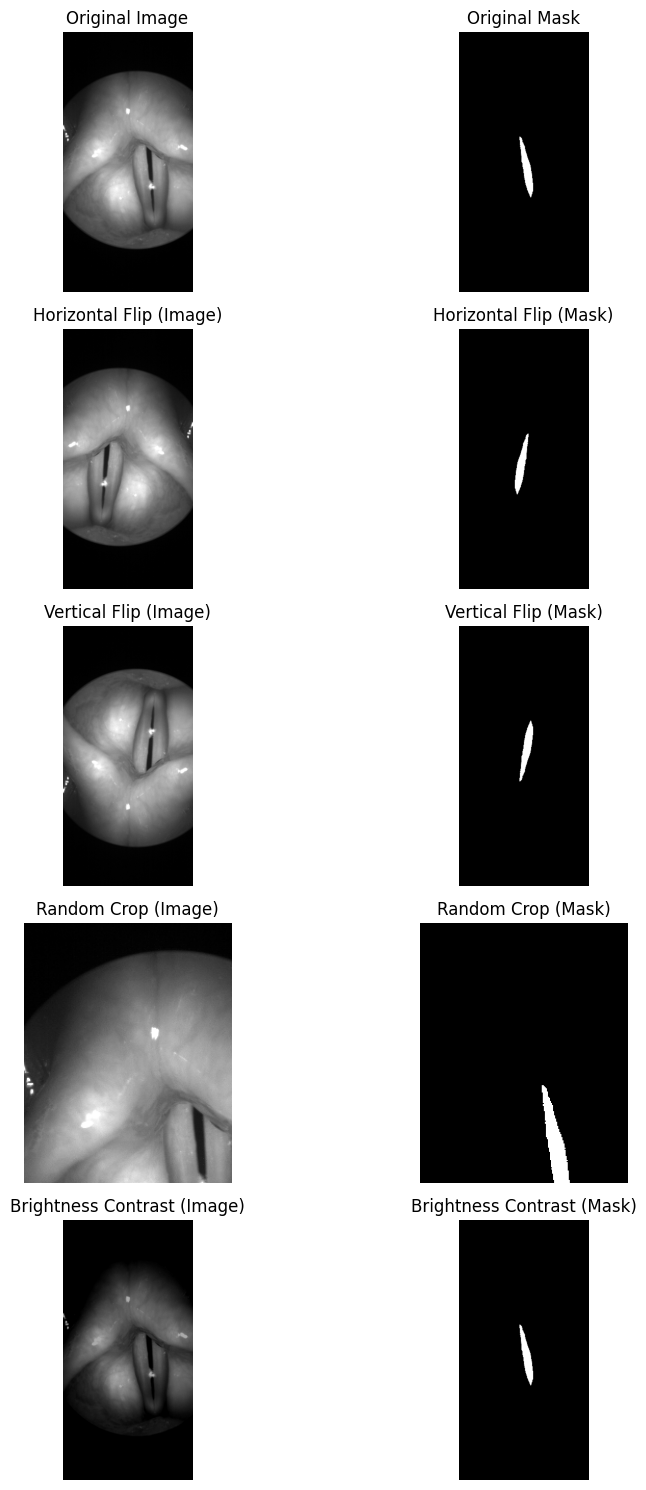

In [37]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
import albumentations as A

# Set the random seed
random.seed(22985091)  # Replace with your matriculation number

# Define paths to the dataset
dataset_path = "Mini_BAGLS_dataset"

# Load all image and mask paths
image_files = sorted([f for f in os.listdir(dataset_path) if f.endswith(".png") and "_seg" not in f])
mask_files = sorted([f for f in os.listdir(dataset_path) if f.endswith("_seg.png")])

# Randomly select an image and its mask
random_idx = np.random.choice(len(image_files))
image_path = os.path.join(dataset_path, image_files[random_idx])
mask_path = os.path.join(dataset_path, mask_files[random_idx])

# Load the image and mask
image = np.array(Image.open(image_path))
mask = np.array(Image.open(mask_path))

# Define individual augmentation transformations
augmentations = [
    A.HorizontalFlip(p=1.0),
    A.VerticalFlip(p=1.0),
    A.RandomCrop(height=250, width=200, p=1),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0)
    #A.Blur(blur_limit=11, p=1.0),
    #A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=70, p=1.0)
    #A.RandomCrop(height=250, width=200, p=1)
]

# Apply augmentations
augmented_images = []
augmented_masks = []
for aug in augmentations:
    augmented = aug(image=image, mask=mask)
    augmented_images.append(augmented["image"])
    augmented_masks.append(augmented["mask"])

# Plot the original and augmented images with masks
fig, axs = plt.subplots(len(augmentations) + 1, 2, figsize=(10, 15))

# Display the original image and mask
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")
axs[0, 1].imshow(mask, cmap="gray")
axs[0, 1].set_title("Original Mask")
axs[0, 1].axis("off")

# Display each augmented image and mask
titles = ["Horizontal Flip", "Vertical Flip", "Random Crop", "Brightness Contrast"]
for i, (aug_img, aug_mask, title) in enumerate(zip(augmented_images, augmented_masks, titles), start=1):
    axs[i, 0].imshow(aug_img)
    axs[i, 0].set_title(f"{title} (Image)")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(aug_mask, cmap="gray")
    axs[i, 1].set_title(f"{title} (Mask)")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.savefig("augmented_images_task2_vertical.png")
plt.show()
